## 6. Modeling - Gaming Accessory
### 1. Linear Model

In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
pd.set_option('display.float_format', '{:0.3f}'.format)

In [2]:
###  Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [3]:
ga_week = pd.read_csv('ga_week.csv', index_col = 0)
ga_week.head()

,week,gmv,listing_price,product_mrp,discount,sla,product_procurement_sla,fsn_id,order_payment_type,online_order_perc,...,lag_3_NPS,lag_1_Stock_Index,lag_2_Stock_Index,lag_3_Stock_Index,lag_1_Special_sales,lag_2_Special_sales,lag_3_Special_sales,lag_1_Payday,lag_2_Payday,lag_3_Payday
0,1,17466.000,681.080,898.440,0.220,2.960,2.560,19,25,100.000,...,54.600,1177.000,1177.000,1177.000,0.000,0.286,0.000,0.000,0.143,0.000
1,2,1435300.000,528.929,963.907,0.414,5.170,3.013,211,689,26.208,...,56.139,1177.000,1177.000,1185.286,0.286,0.000,0.000,0.143,0.000,0.143
2,3,1097388.359,449.826,759.691,0.429,5.115,2.514,216,534,22.418,...,59.987,1177.000,1185.286,1206.000,0.000,0.000,0.000,0.000,0.143,0.000
3,4,1158166.000,559.134,889.058,0.352,5.179,2.338,232,425,21.008,...,59.987,1185.286,1206.000,1206.000,0.000,0.000,0.286,0.143,0.000,0.143
4,5,742062.000,554.214,886.076,0.363,5.552,2.325,224,246,18.880,...,59.987,1206.000,1206.000,1206.000,0.000,0.286,0.143,0.000,0.143,0.000


In [4]:
ga_week.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'order_payment_type',
       'online_order_perc', 'Date', 'Year', 'Month', 'TV_ads',
       'Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days',
       'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm',
       'MA2_listed_price', 'MA2_discount', 'MA4_discount',
       'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price',
       'lag_1_discount_offer', 'lag_2_discount_offer', 'lag_3_discount_offer',
       'lag_1_NPS', 'lag_2_NPS', 'lag_3_NPS', 'lag_1_Stock_Index',
       'lag_2_Stock_Index', 'lag_3_Stock_Index', 'lag_1_Special_sales',
       'lag_2_Special_sales', 'lag_3_Special_sales', 'lag_1_Payday',
       'lag_2_Payday', 'lag_3_Payday'],
      dtype='object')

In [5]:
gaming_lm = ga_week[['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price']]
                            
    
gaming_lm.head()

,gmv,discount,sla,product_procurement_sla,order_payment_type,online_order_perc,TV_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,NPS,Stock_Index,Special_sales,Payday,heat_deg_days,cool_deg_days,total_rain_mm,total_snow_cm,snow_on_grnd_cm,MA2_listed_price
0,17466.000,0.220,2.960,2.560,25,100.000,0.054,1.854,0.000,0.332,54.600,1177.000,0.000,0.200,0.100,1.460,0.000,0.000,0.000,0.000
1,1435300.000,0.414,5.170,3.013,689,26.208,0.081,2.780,0.000,0.498,54.600,1177.000,0.000,0.000,1.059,2.322,4.155,0.029,0.041,-0.126
2,1097388.359,0.429,5.115,2.514,534,22.418,0.081,2.780,0.000,0.498,54.600,1177.000,0.286,0.143,0.816,4.722,1.569,0.029,0.041,-0.081
3,1158166.000,0.352,5.179,2.338,425,21.008,0.081,2.780,0.000,0.498,54.600,1177.000,0.000,0.000,1.632,4.172,1.141,0.029,0.041,0.108
4,742062.000,0.363,5.552,2.325,246,18.880,0.028,1.139,0.000,0.192,56.139,1185.286,0.000,0.143,0.816,5.908,4.341,0.029,0.041,-0.004


In [6]:
### Checking NaN
gaming_lm.isnull().sum()

gmv                         0
discount                    0
sla                         0
product_procurement_sla     0
order_payment_type          0
online_order_perc           0
TV_ads                     18
Sponsorship_ads            18
Content_marketing_ads      18
Online_marketing_ads       18
NPS                         0
Stock_Index                 0
Special_sales               0
Payday                      0
heat_deg_days               0
cool_deg_days               0
total_rain_mm               0
total_snow_cm               0
snow_on_grnd_cm             0
MA2_listed_price            0
dtype: int64

In [7]:
gaming_lm.fillna(0, inplace = True)

In [8]:
# from sklearn.model_selection import train_test_split


# np.random.seed(0)
# df_train, df_test = train_test_split(camera_lm, train_size = 0.7, test_size = 0.3, random_state = 100)

In [9]:
### Import the StandardScaler()
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()


### Create a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price']
                                      

### Scale these variables using 'fit_transform'
gaming_lm[varlist] = scaler.fit_transform(gaming_lm[varlist])

In [10]:
gaming_lm.head()

,gmv,discount,sla,product_procurement_sla,order_payment_type,online_order_perc,TV_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,NPS,Stock_Index,Special_sales,Payday,heat_deg_days,cool_deg_days,total_rain_mm,total_snow_cm,snow_on_grnd_cm,MA2_listed_price
0,0.004,0.000,0.000,0.491,0.009,1.000,0.023,0.058,0.000,0.036,0.654,0.714,0.000,1.000,0.000,0.247,0.000,0.000,0.000,0.440
1,0.363,0.615,0.596,0.825,0.235,0.262,0.035,0.088,0.000,0.054,0.654,0.714,0.000,0.000,0.069,0.393,0.420,0.019,0.009,0.324
2,0.278,0.663,0.581,0.457,0.182,0.224,0.035,0.088,0.000,0.054,0.654,0.714,0.286,0.714,0.051,0.799,0.159,0.019,0.009,0.366
3,0.293,0.421,0.598,0.327,0.145,0.210,0.035,0.088,0.000,0.054,0.654,0.714,0.000,0.000,0.109,0.706,0.115,0.019,0.009,0.539
4,0.188,0.456,0.699,0.318,0.084,0.189,0.012,0.036,0.000,0.021,0.753,0.750,0.000,0.714,0.051,1.000,0.439,0.019,0.009,0.436


In [11]:
### Split the train dataset into X and y
from sklearn.model_selection import train_test_split
x = gaming_lm.drop('gmv',axis=1)
y = gaming_lm['gmv']

gaming_train_lm = gaming_lm

In [12]:
print("x dataset: ",x.shape)
print("y dataset: ",y.shape)

x dataset:  (53, 19)
y dataset:  (53,)


In [13]:
###  Instantiate
lm = LinearRegression()

###  Fit a line
lm.fit(x,y)

LinearRegression()

In [14]:
###  Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(lm.coef_)
coef

,0,Coefficient
0,discount,0.211
1,sla,-0.207
2,product_procurement_sla,0.101
3,order_payment_type,0.784
4,online_order_perc,-0.370
5,TV_ads,-0.682
6,Sponsorship_ads,-0.078
7,Content_marketing_ads,0.107
8,Online_marketing_ads,0.532
9,NPS,-0.535


In [15]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days',
       'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm',
       'MA2_listed_price'],
      dtype='object')

### Model Building - Stepwise selection for feature selection

In [16]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [17]:
def stepwise_selection(x, y,
                       initial_list=['discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price'],
                       threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ###forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [18]:
import statsmodels.api as sm  

final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Drop snow_on_grnd_cm                with p-value 0.929034
Drop Special_sales                  with p-value 0.794262
Drop cool_deg_days                  with p-value 0.751496
Drop total_rain_mm                  with p-value 0.49878
Drop Sponsorship_ads                with p-value 0.350678
Drop total_snow_cm                  with p-value 0.335631
Drop Content_marketing_ads          with p-value 0.327851
Drop product_procurement_sla        with p-value 0.225136
Drop Payday                         with p-value 0.14013
Drop discount                       with p-value 0.0782777
Drop MA2_listed_price               with p-value 0.35588

 final_selected_features: ['sla', 'order_payment_type', 'online_order_perc', 'TV_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index', 'heat_deg_days']


In [19]:
###  Import statsmodels
import statsmodels.api as sm  

###  Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]

x_rfe1 = sm.add_constant(x_rfe1)

###  Fitting the model with selected variables
lm1 = sm.OLS(y, x_rfe1).fit() 

print(lm1.params)

const                   0.720
sla                    -0.200
order_payment_type      0.899
online_order_perc      -0.478
TV_ads                 -0.769
Online_marketing_ads    0.620
NPS                    -0.498
Stock_Index            -0.091
heat_deg_days          -0.172
dtype: float64


In [20]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     28.82
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           4.48e-15
Time:                        17:37:11   Log-Likelihood:                 65.391
No. Observations:                  53   AIC:                            -112.8
Df Residuals:                      44   BIC:                            -95.05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.7197 

In [21]:
###  Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,63.090
4,TV_ads,28.730
5,Online_marketing_ads,28.040
2,order_payment_type,2.810
6,NPS,2.770
8,heat_deg_days,2.720
1,sla,2.440
3,online_order_perc,2.440
7,Stock_Index,1.410


In [22]:
features = list(x_rfe1.columns)
features.remove('const')
features

['sla',
 'order_payment_type',
 'online_order_perc',
 'TV_ads',
 'Online_marketing_ads',
 'NPS',
 'Stock_Index',
 'heat_deg_days']

In [23]:
###  Model Evaluation on testing data
x_2 = x[features]


###  Predicition with selected features on the test data
y_pred = lm1.predict(sm.add_constant(x_2))

In [24]:
###  Mean square error (MSE)

mse = np.mean((y_pred - y)**2)
mse

0.004964351642197166

In [25]:
###  Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(lm.coef_)
coef

,0,Coefficient
0,const,0.211
1,sla,-0.207
2,order_payment_type,0.101
3,online_order_perc,0.784
4,TV_ads,-0.370
5,Online_marketing_ads,-0.682
6,NPS,-0.078
7,Stock_Index,0.107
8,heat_deg_days,0.532


In [26]:
### Mean Square Error 
###  Using K-Fold Cross validation evaluating on selected dataset

# lm = LinearRegression()
fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(lm,x[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [0.005255   0.00066532 0.02654512 0.0143743  0.00143457 0.01099389
 0.00449101 0.00371473 0.04566453 0.00543397] 

Mean of 5 KFold CV - MSE: 0.011857245195089777


In [27]:
def elasticity(model,x):
    
    features_df = pd.DataFrame(model.params)
    features_df = features_df.rename(columns={0:'coef'})
    
    features_df['imp_feature'] = model.params.index
    features_df = features_df[features_df.imp_feature != 'const'][['imp_feature','coef']]
    features_df.index = range(len(features_df))
#    features

    elasticity_list = list()
    
    for i in range(len(features_df)):
        elasticity_list.append(((features_df.coef[i] * np.mean(x[features_df.imp_feature[i]])) / np.mean(x['gmv'])))

    features_df['elasticity'] = np.round(elasticity_list,3)
    
    sns.barplot(x='elasticity',y='imp_feature',data=features_df)
    plt.show()
    
    return features_df

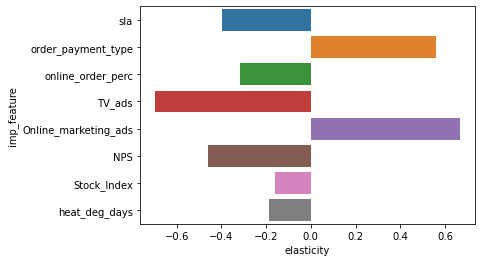

,imp_feature,coef,elasticity
0,sla,-0.200,-0.396
1,order_payment_type,0.899,0.559
2,online_order_perc,-0.478,-0.316
3,TV_ads,-0.769,-0.696
4,Online_marketing_ads,0.620,0.666
5,NPS,-0.498,-0.460
6,Stock_Index,-0.091,-0.160
7,heat_deg_days,-0.172,-0.189


In [28]:
elasticity(lm1,gaming_train_lm)

Text(0, 0.5, 'y_pred')

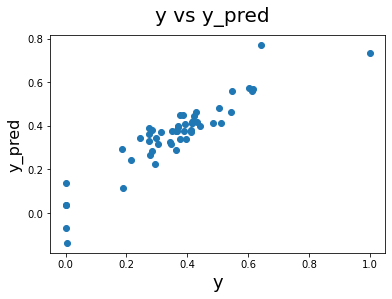

In [29]:
# Plotting y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

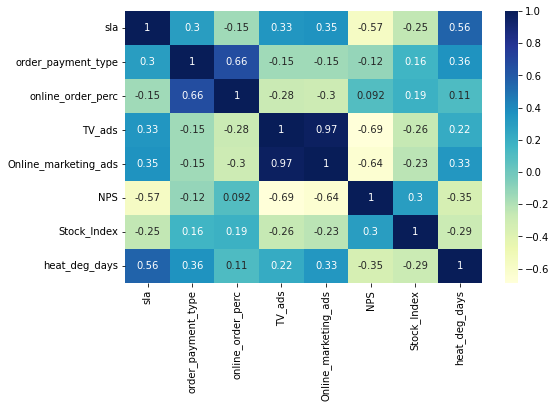

In [30]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(gaming_train_lm[features].corr(), cmap="YlGnBu", annot=True)
plt.show()

### Multiplicative Model

In [31]:
ga_week.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'order_payment_type',
       'online_order_perc', 'Date', 'Year', 'Month', 'TV_ads',
       'Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days',
       'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm',
       'MA2_listed_price', 'MA2_discount', 'MA4_discount',
       'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price',
       'lag_1_discount_offer', 'lag_2_discount_offer', 'lag_3_discount_offer',
       'lag_1_NPS', 'lag_2_NPS', 'lag_3_NPS', 'lag_1_Stock_Index',
       'lag_2_Stock_Index', 'lag_3_Stock_Index', 'lag_1_Special_sales',
       'lag_2_Special_sales', 'lag_3_Special_sales', 'lag_1_Payday',
       'lag_2_Payday', 'lag_3_Payday'],
      dtype='object')

In [32]:
gaming_mm = ga_week[['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price']]         

gaming_mm.head()

,gmv,discount,sla,product_procurement_sla,order_payment_type,online_order_perc,TV_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,NPS,Stock_Index,Special_sales,Payday,heat_deg_days,cool_deg_days,total_rain_mm,total_snow_cm,snow_on_grnd_cm,MA2_listed_price
0,17466.000,0.220,2.960,2.560,25,100.000,0.054,1.854,0.000,0.332,54.600,1177.000,0.000,0.200,0.100,1.460,0.000,0.000,0.000,0.000
1,1435300.000,0.414,5.170,3.013,689,26.208,0.081,2.780,0.000,0.498,54.600,1177.000,0.000,0.000,1.059,2.322,4.155,0.029,0.041,-0.126
2,1097388.359,0.429,5.115,2.514,534,22.418,0.081,2.780,0.000,0.498,54.600,1177.000,0.286,0.143,0.816,4.722,1.569,0.029,0.041,-0.081
3,1158166.000,0.352,5.179,2.338,425,21.008,0.081,2.780,0.000,0.498,54.600,1177.000,0.000,0.000,1.632,4.172,1.141,0.029,0.041,0.108
4,742062.000,0.363,5.552,2.325,246,18.880,0.028,1.139,0.000,0.192,56.139,1185.286,0.000,0.143,0.816,5.908,4.341,0.029,0.041,-0.004


In [33]:
### Applying Log 
gaming_mm=np.log(gaming_mm)

gaming_mm = gaming_mm.fillna(0)
gaming_mm = gaming_mm.replace([np.inf, -np.inf], 0)

In [34]:
gaming_mm.head()

,gmv,discount,sla,product_procurement_sla,order_payment_type,online_order_perc,TV_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,NPS,Stock_Index,Special_sales,Payday,heat_deg_days,cool_deg_days,total_rain_mm,total_snow_cm,snow_on_grnd_cm,MA2_listed_price
0,9.768,-1.516,1.085,0.940,3.219,4.605,-2.922,0.617,-8.364,-1.103,4.000,7.071,0.000,-1.609,-2.303,0.378,0.000,0.000,0.000,0.000
1,14.177,-0.883,1.643,1.103,6.535,3.266,-2.516,1.023,-7.958,-0.698,4.000,7.071,0.000,0.000,0.057,0.842,1.424,-3.532,-3.189,0.000
2,13.908,-0.847,1.632,0.922,6.280,3.110,-2.516,1.023,-7.958,-0.698,4.000,7.071,-1.253,-1.946,-0.203,1.552,0.451,-3.532,-3.189,0.000
3,13.962,-1.043,1.645,0.849,6.052,3.045,-2.516,1.023,-7.958,-0.698,4.000,7.071,0.000,0.000,0.490,1.428,0.131,-3.532,-3.189,-2.222
4,13.517,-1.012,1.714,0.844,5.505,2.938,-3.568,0.131,-9.046,-1.652,4.028,7.078,0.000,-1.946,-0.203,1.776,1.468,-3.532,-3.189,0.000


In [35]:
###  Import the StandardScaler()
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

###  Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()

###  Create a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price']      



### Scale these variables using 'fit_transform'
gaming_mm[varlist] = scaler.fit_transform(gaming_mm[varlist])

In [36]:
gaming_mm.head()

,gmv,discount,sla,product_procurement_sla,order_payment_type,online_order_perc,TV_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,NPS,Stock_Index,Special_sales,Payday,heat_deg_days,cool_deg_days,total_rain_mm,total_snow_cm,snow_on_grnd_cm,MA2_listed_price
0,0.417,0.000,0.000,0.558,0.403,1.000,0.470,0.382,0.358,0.393,0.687,0.734,1.000,0.173,0.000,0.408,0.303,0.895,0.677,1.000
1,0.891,0.711,0.687,0.860,0.819,0.709,0.527,0.471,0.388,0.467,0.687,0.734,1.000,1.000,0.477,0.604,0.736,0.000,0.000,1.000
2,0.862,0.751,0.674,0.524,0.787,0.675,0.527,0.471,0.388,0.467,0.687,0.734,0.356,0.000,0.424,0.905,0.440,0.000,0.000,1.000
3,0.868,0.531,0.689,0.390,0.758,0.661,0.527,0.471,0.388,0.467,0.687,0.734,1.000,1.000,0.564,0.853,0.343,0.000,0.000,0.652
4,0.820,0.566,0.774,0.380,0.690,0.638,0.378,0.277,0.307,0.293,0.780,0.768,1.000,0.000,0.424,1.000,0.750,0.000,0.000,1.000


In [37]:
### Split the train dataset into X and y
from sklearn.model_selection import train_test_split

x = gaming_mm.drop('gmv',axis=1)
y = gaming_mm['gmv']

gaming_train_mm = gaming_mm

In [38]:
print("X = Independent variable & Y = Target variable")
print(x.shape,y.shape)

X = Independent variable & Y = Target variable
(53, 19) (53,)


In [39]:
### Instantiate
mm = LinearRegression()

### Fit a line
mm.fit(x,y)

LinearRegression()

In [40]:
### Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(mm.coef_)
coef

,0,Coefficient
0,discount,-0.176
1,sla,0.175
2,product_procurement_sla,0.035
3,order_payment_type,1.194
4,online_order_perc,-0.530
5,TV_ads,0.444
6,Sponsorship_ads,-0.022
7,Content_marketing_ads,-0.163
8,Online_marketing_ads,-0.058
9,NPS,0.043


In [41]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days',
       'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm',
       'MA2_listed_price'],
      dtype='object')

### Model Building - Stepwise selection for feature selection

In [42]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [43]:
def stepwise_selection(x, y,
                       initial_list=['discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price'],
                       threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ###forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [44]:
import statsmodels.api as sm  

final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Drop total_rain_mm                  with p-value 0.900744
Drop MA2_listed_price               with p-value 0.848923
Drop Special_sales                  with p-value 0.82828
Drop cool_deg_days                  with p-value 0.612655
Drop NPS                            with p-value 0.594907
Drop total_snow_cm                  with p-value 0.576808
Drop Stock_Index                    with p-value 0.546579
Drop Payday                         with p-value 0.374724
Drop Online_marketing_ads           with p-value 0.381084
Drop product_procurement_sla        with p-value 0.0630449
Drop Sponsorship_ads                with p-value 0.15082
Drop Content_marketing_ads          with p-value 0.157148

 final_selected_features: ['discount', 'sla', 'order_payment_type', 'online_order_perc', 'TV_ads', 'heat_deg_days', 'snow_on_grnd_cm']


In [45]:
### Import statsmodels
import statsmodels.api as sm  

### Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]

x_rfe1 = sm.add_constant(x_rfe1)


### Fitting the model with selected variables
mm1 = sm.OLS(y, x_rfe1).fit() 

print(mm1.params)

const                 0.272
discount             -0.173
sla                   0.162
order_payment_type    1.204
online_order_perc    -0.478
TV_ads                0.131
heat_deg_days        -0.211
snow_on_grnd_cm       0.075
dtype: float64


In [46]:
print(mm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     455.8
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           1.40e-39
Time:                        17:37:13   Log-Likelihood:                 117.59
No. Observations:                  53   AIC:                            -219.2
Df Residuals:                      45   BIC:                            -203.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2716      0

In [47]:
### Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,63.000
3,order_payment_type,17.900
4,online_order_perc,9.030
5,TV_ads,4.990
2,sla,3.450
6,heat_deg_days,3.340
1,discount,2.300
7,snow_on_grnd_cm,1.480


In [48]:
x_rfe1.drop('order_payment_type', axis = 1, inplace = True)

### 2

In [49]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
mm1 = sm.OLS(y, x_rfe1).fit()   
print(mm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     71.25
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           1.27e-21
Time:                        17:37:13   Log-Likelihood:                 66.071
No. Observations:                  53   AIC:                            -118.1
Df Residuals:                      46   BIC:                            -104.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0301      0.06

In [50]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,41.050
5,heat_deg_days,3.320
4,TV_ads,3.200
2,sla,2.730
3,online_order_perc,2.210
1,discount,1.540
6,snow_on_grnd_cm,1.420


In [51]:
x_rfe1.drop('snow_on_grnd_cm', axis = 1, inplace = True)


### 3

In [52]:
# https://www.kaggle.com/goyalshalini93/market-mix-model-eleckart/notebook

In [53]:
# 501